In [49]:
######### Data Exploring & Cleaning #############

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [50]:
#pandas dataframe fro the pollution data set

poldata = pd.read_csv('LaqnData-12.csv')
poldata.tail()

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
26275,SK6,PM10,31/12/2019 19:00,31.6,ug/m3,R
26276,SK6,PM10,31/12/2019 20:00,29.3,ug/m3,R
26277,SK6,PM10,31/12/2019 21:00,32.6,ug/m3,R
26278,SK6,PM10,31/12/2019 22:00,32.0,ug/m3,R
26279,SK6,PM10,31/12/2019 23:00,44.4,ug/m3,R


In [51]:
print(poldata.shape)

(26280, 6)


In [52]:
#pandas dataframe for weather data
weatherdata = pd.read_csv('weather data.csv')
weatherdata.head()


C:\Users\Viki\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (18,26,29) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,STATION,DATE,SOURCE,LATITUDE,LONGITUDE,ELEVATION,NAME,REPORT_TYPE,CALL_SIGN,QUALITY_CONTROL,...,KA1,MA1,MD1,MW1,MW2,OC1,OD1,OD2,REM,EQD
0,3672099999,2019-01-01T00:00:00,4,51.553,-0.418167,37.79,"NORTHOLT, UK",FM-12,99999,V020,...,NaN,"99999,9,10306,1","6,1,004,1,+999,9",NaN,NaN,NaN,NaN,NaN,SYN06403672 16580 /3007 10086 20049 30306 4034...,NaN
1,3672099999,2019-01-01T00:50:00,4,51.553,-0.418167,37.79,"NORTHOLT, UK",FM-15,99999,V020,...,NaN,"10340,1,99999,9",NaN,NaN,NaN,NaN,NaN,NaN,MET062METAR EGWU 010050Z AUTO 31007KT 9999 // ...,NaN
2,3672099999,2019-01-01T01:00:00,4,51.553,-0.418167,37.79,"NORTHOLT, UK",FM-12,99999,V020,...,NaN,"99999,9,10303,1","7,1,005,1,+999,9",NaN,NaN,NaN,NaN,NaN,SYN06803672 46577 /3107 10086 20048 30303 4034...,NaN
3,3672099999,2019-01-01T01:50:00,4,51.553,-0.418167,37.79,"NORTHOLT, UK",FM-15,99999,V020,...,NaN,"10340,1,99999,9",NaN,NaN,NaN,NaN,NaN,NaN,MET062METAR EGWU 010150Z AUTO 31008KT 9999 // ...,NaN
4,3672099999,2019-01-01T02:00:00,4,51.553,-0.418167,37.79,"NORTHOLT, UK",FM-12,99999,V020,...,NaN,"99999,9,10304,1","7,1,003,1,+999,9",NaN,NaN,NaN,NaN,NaN,SYN05803672 46582 /3108 10088 20045 30304 4034...,NaN


In [53]:
print(weatherdata.shape)

(20679, 40)


In [54]:
# Parsing datasets of both the column

poldata = pd.read_csv('LaqnData-12.csv',parse_dates = ['ReadingDateTime'])
weatherdata = pd.read_csv('weather data.csv',parse_dates = ['DATE'])

C:\Users\Viki\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (18,26,29) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [55]:
#Extracting numerical values of dew point

weatherdata['DEW'] = weatherdata['DEW'].str[:-2].astype(np.float64)/10
weatherdata['TMP'] = weatherdata['TMP'].str[:-2].astype(np.float64)/10
weatherdata['DIR'] = weatherdata['WND'].str[:3].astype(np.float64)
weatherdata['SPD'] = (weatherdata['WND'].str[8:-2].astype(np.float64)/10)*3.6



In [56]:
## calculating relative humidity from dew and temperature

weatherdata['HUM'] = 100*(np.exp((23.625 * weatherdata['DEW'])/(90.04 + weatherdata['DEW'])
                         )/np.exp((23.25 * weatherdata['TMP'])/(90.04 + weatherdata['TMP'])))

In [57]:
# Replacing missing wind direction with null

weatherdata.DIR.replace(999,np.nan,inplace=True)

In [58]:
# joining weather and pollution datasets


data_new = pd.concat([weatherdata['DATE'],weatherdata['DEW'],weatherdata['TMP'],
       weatherdata['DIR'],weatherdata['SPD'],weatherdata['HUM'],
       poldata.Value[poldata.Species=='NOX'].reset_index(drop=True).rename('NOX'),
       poldata.Value[poldata.Species=='O3'].reset_index(drop=True).rename('O3'),
       poldata.Value[poldata.Species=='PM10'].reset_index(drop=True).rename('PM10')], 
       axis=1)

data_new.head()

,DATE,DEW,TMP,DIR,SPD,HUM,NOX,O3,PM10
0,2019-01-01 00:00:00,4.9,8.6,300.0,12.96,44.586218,22.1,49.4,19.7
1,2019-01-01 00:50:00,5.0,9.0,310.0,12.96,41.899974,18.0,55.7,18.3
2,2019-01-01 01:00:00,4.8,8.6,310.0,12.96,43.545226,15.2,57.5,11.6
3,2019-01-01 01:50:00,5.0,9.0,310.0,14.76,41.899974,14.4,57.4,14.2
4,2019-01-01 02:00:00,4.5,8.8,310.0,14.76,38.848989,14.2,57.0,17.9


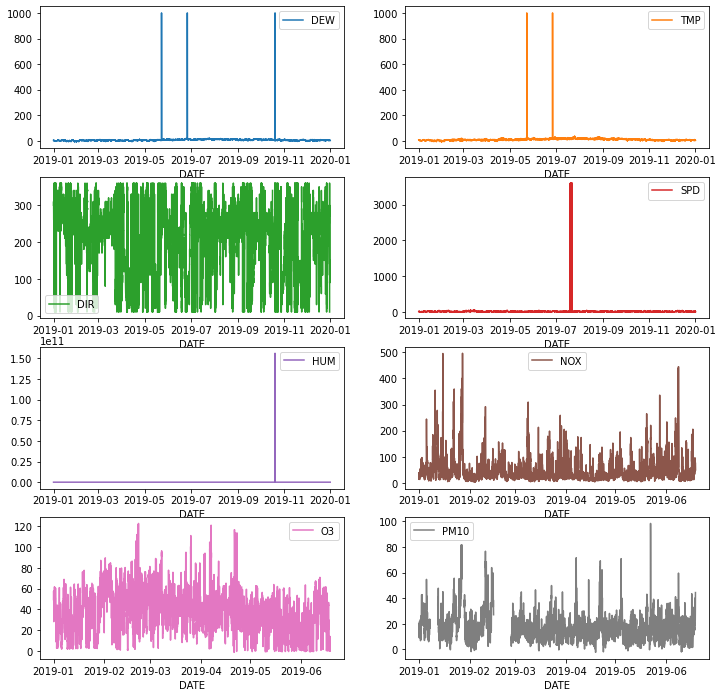

In [59]:
data_new.set_index('DATE').plot(subplots=True,layout=(4,2), figsize=(12, 12),sharex=False);

In [60]:
#### Checking the possible Outliers

data_new.describe()

,DEW,TMP,DIR,SPD,HUM,NOX,O3,PM10
count,20679.000000,20679.000000,20401.000000,20679.000000,2.067900e+04,8672.000000,8681.000000,7898.000000
mean,8.237753,11.912728,205.663938,18.656301,9.262477e+07,45.826107,38.454602,16.739896
std,28.841691,11.609167,92.907299,129.748680,3.477470e+09,43.549004,20.941628,10.007165
min,-7.000000,-6.200000,10.000000,0.000000,1.120869e+00,3.400000,-1.500000,-2.300000
25%,4.000000,7.300000,140.000000,7.560000,2.800062e+01,20.700000,24.300000,10.400000
50%,7.400000,11.000000,230.000000,12.960000,5.217146e+01,32.500000,39.200000,14.400000
75%,11.000000,16.100000,270.000000,18.360000,7.650149e+01,53.600000,52.400000,20.300000
max,999.900000,999.900000,360.000000,3599.640000,1.560266e+11,496.100010,122.800000,98.400000


In [61]:
##print(data_new.shape)

In [62]:
##data_new.isnull().sum()

In [63]:
data = data_new
minmax = {'Species': ['DEW', 'TMP', 'DIR', 'SPD', 'HUM','NOX','O3','PM10'], 
        'Min': [data['DEW'].min(), data['TMP'].min(),data['DIR'].min(),data['SPD'].min(),data['HUM'].min(),data['NOX'].min(),data['O3'].min(),data['PM10'].min()], 
        'Max': [data['DEW'].max(), data['TMP'].max(),data['DIR'].max(),data['SPD'].max(),data['HUM'].max(),data['NOX'].max(),data['O3'].max(),data['PM10'].max()]}
pd.DataFrame(minmax, columns = ['Species', 'Min', 'Max'])

,Species,Min,Max
0,DEW,-7.000000,9.999000e+02
1,TMP,-6.200000,9.999000e+02
2,DIR,10.000000,3.600000e+02
3,SPD,0.000000,3.599640e+03
4,HUM,1.120869,1.560266e+11
5,NOX,3.400000,4.961000e+02
6,O3,-1.500000,1.228000e+02
7,PM10,-2.300000,9.840000e+01


In [64]:
## Replacing the possible(negative/positive) outliers with null
## Ozone cannot be negative range
## PM10 cannot be in negative range
## PM10 positive outlier is a possible value
## Speed cannot be more than 324km/hr,the values above are replaced with null


data_new["DEW"] = np.where(data_new["DEW"] > 36, 0,data_new['DEW'])
data_new["TMP"] = np.where(data_new["TMP"] > 61, 0,data_new['TMP'])
data_new["PM10"] = np.where(data_new["PM10"] < 1, 0,data_new['PM10'])
data_new["O3"] = np.where(data_new["O3"] < 1, 0,data_new['O3'])
data_new["SPD"] = np.where(data_new["SPD"] > 324, 0,data_new['SPD'])
data_new["HUM"] = np.where(data_new["HUM"] > 100, 0,data_new['HUM'])
data_new.head()


,DATE,DEW,TMP,DIR,SPD,HUM,NOX,O3,PM10
0,2019-01-01 00:00:00,4.9,8.6,300.0,12.96,44.586218,22.1,49.4,19.7
1,2019-01-01 00:50:00,5.0,9.0,310.0,12.96,41.899974,18.0,55.7,18.3
2,2019-01-01 01:00:00,4.8,8.6,310.0,12.96,43.545226,15.2,57.5,11.6
3,2019-01-01 01:50:00,5.0,9.0,310.0,14.76,41.899974,14.4,57.4,14.2
4,2019-01-01 02:00:00,4.5,8.8,310.0,14.76,38.848989,14.2,57.0,17.9


In [65]:
#df_new = df.replace(np.nan, 0)
#print(df_new)

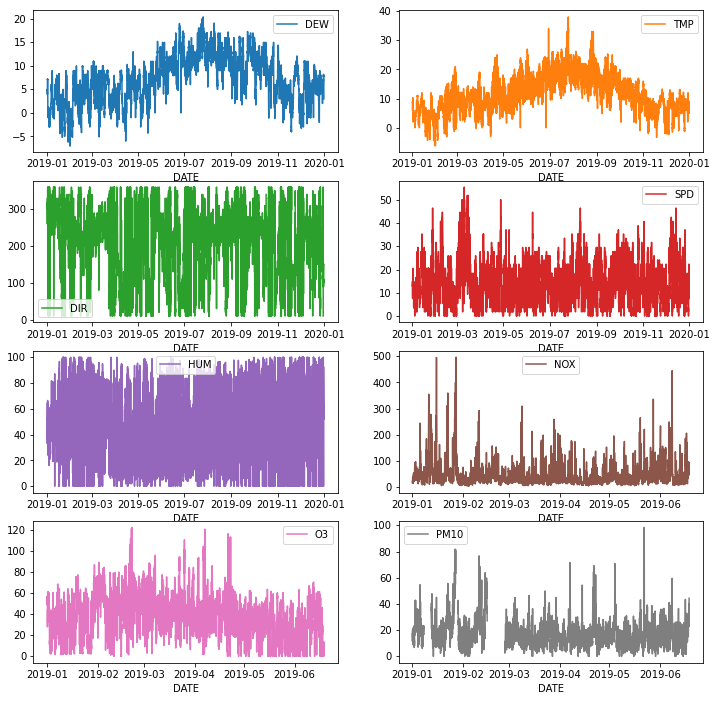

In [66]:
data_new.set_index('DATE').plot(subplots=True,layout=(4,2), figsize=(12, 12),sharex=False);

In [67]:
### Only positive outliers exists

df = data_new

print('DEW:',((df['DEW'] < 1) | (df['DEW'] > 400)).sum())

print('NOX:',((df['NOX'] < 4) | (df['NOX'] > 700)).sum())

print('TMP:',((df['TMP'] < 0) | (df['TMP'] > 190)).sum())

print('PM10:',((df['PM10'] < 0) | (df['PM10'] > 190)).sum())

print('HUM:',((df['HUM'] < 0) | (df['HUM'] > 100)).sum())

print('DIR:',((df['DIR'] < 0) | (df['DIR'] > 360)).sum())

print('SPD:',((df['SPD'] < 0) | (df['SPD'] > 6)).sum())

print('O3:',((df['O3'] < 0) | (df['O3'] > 140)).sum())

DEW: 1904
NOX: 2
TMP: 404
PM10: 0
HUM: 0
DIR: 0
SPD: 16635
O3: 0


In [21]:
#### Downloading the cleaned dataset

data_new.to_csv (r'C:\Users\Viki\Desktop\outputTHREE.csv', index = False, header=True)

In [22]:
data = data_new
minmax = {'Species': ['DEW', 'TMP', 'DIR', 'SPD', 'HUM','NOX','O3','PM10'], 
        'Min': [data['DEW'].min(), data['TMP'].min(),data['DIR'].min(),data['SPD'].min(),data['HUM'].min(),data['NOX'].min(),data['O3'].min(),data['PM10'].min()], 
        'Max': [data['DEW'].max(), data['TMP'].max(),data['DIR'].max(),data['SPD'].max(),data['HUM'].max(),data['NOX'].max(),data['O3'].max(),data['PM10'].max()]}
pd.DataFrame(minmax, columns = ['Species', 'Min', 'Max'])

,Species,Min,Max
0,DEW,-6.7,19.650000
1,TMP,-5.8,36.766667
2,DIR,10.0,360.000000
3,SPD,0.0,52.740000
4,HUM,0.0,99.993724
5,NOX,3.4,496.100010
6,O3,0.0,122.800000
7,PM10,0.0,98.400000


In [23]:
data_new.isnull().sum()

DATE      0
DEW       6
TMP       6
DIR      43
SPD       6
HUM       6
NOX      88
O3       79
PM10    862
dtype: int64

In [24]:
## Data Engineering
data_new['MONTH'] = pd.DatetimeIndex(data['DATE']).month
data_new['DAY'] = pd.DatetimeIndex(data['DATE']).weekday
data_new['HOUR'] = pd.DatetimeIndex(data['DATE']).hour

In [25]:
data_new.describe()

,DEW,TMP,DIR,SPD,HUM,NOX,O3,PM10,MONTH,DAY,HOUR
count,8754.00000,8754.000000,8717.000000,8754.000000,8754.000000,8672.000000,8681.000000,7898.000000,8760.000000,8760.000000,8760.000000
mean,7.12108,11.465986,205.573485,13.644246,50.607584,45.826107,38.449234,16.740972,6.526027,2.994521,11.500000
std,4.75622,6.218934,86.789796,8.078503,27.144784,43.549004,20.951295,10.005195,3.448048,2.000107,6.922582
min,-6.70000,-5.800000,10.000000,0.000000,0.000000,3.400000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,3.70000,7.154167,143.333333,7.560000,27.403905,20.700000,24.300000,10.400000,4.000000,1.000000,5.750000
50%,7.10000,10.900000,225.000000,12.960000,51.512305,32.500000,39.200000,14.400000,7.000000,3.000000,11.500000
75%,10.80000,15.866667,266.666667,18.540000,74.394701,53.600000,52.400000,20.300000,10.000000,5.000000,17.250000
max,19.65000,36.766667,360.000000,52.740000,99.993724,496.100010,122.800000,98.400000,12.000000,6.000000,23.000000


<AxesSubplot:>

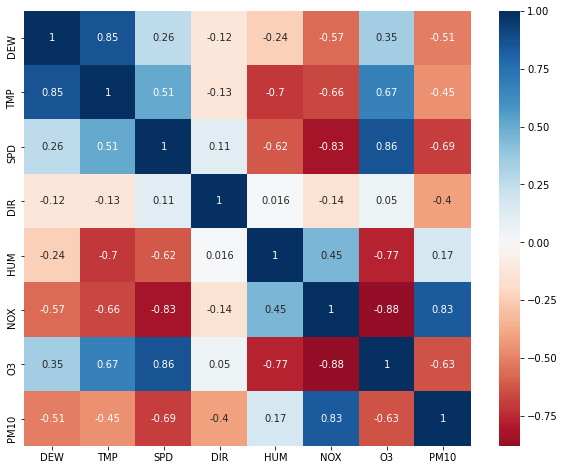

In [26]:
plt.rcParams["figure.figsize"] = [10,8]
data_new_corr = data[['DEW','TMP','SPD','DIR','HUM','NOX','O3','PM10']].corr()

corr = data_new_corr.corr()
sns.heatmap(corr, center=0, annot=True,cmap="RdBu",
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [27]:
data_new.describe()

,DEW,TMP,DIR,SPD,HUM,NOX,O3,PM10,MONTH,DAY,HOUR
count,8754.00000,8754.000000,8717.000000,8754.000000,8754.000000,8672.000000,8681.000000,7898.000000,8760.000000,8760.000000,8760.000000
mean,7.12108,11.465986,205.573485,13.644246,50.607584,45.826107,38.449234,16.740972,6.526027,2.994521,11.500000
std,4.75622,6.218934,86.789796,8.078503,27.144784,43.549004,20.951295,10.005195,3.448048,2.000107,6.922582
min,-6.70000,-5.800000,10.000000,0.000000,0.000000,3.400000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,3.70000,7.154167,143.333333,7.560000,27.403905,20.700000,24.300000,10.400000,4.000000,1.000000,5.750000
50%,7.10000,10.900000,225.000000,12.960000,51.512305,32.500000,39.200000,14.400000,7.000000,3.000000,11.500000
75%,10.80000,15.866667,266.666667,18.540000,74.394701,53.600000,52.400000,20.300000,10.000000,5.000000,17.250000
max,19.65000,36.766667,360.000000,52.740000,99.993724,496.100010,122.800000,98.400000,12.000000,6.000000,23.000000


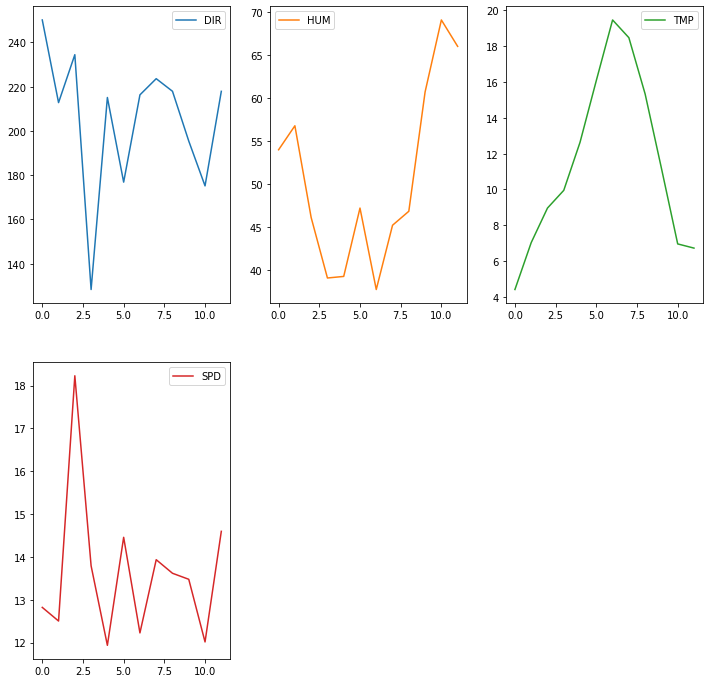

In [35]:
data_new = data[['DIR','HUM','TMP','SPD','MONTH']].groupby('MONTH').apply(lambda x:x.mean())
data_new.drop('MONTH',axis=1).reset_index().drop('MONTH',axis=1).plot(subplots=True,layout=(2,3), figsize=(12, 12),sharex=False);

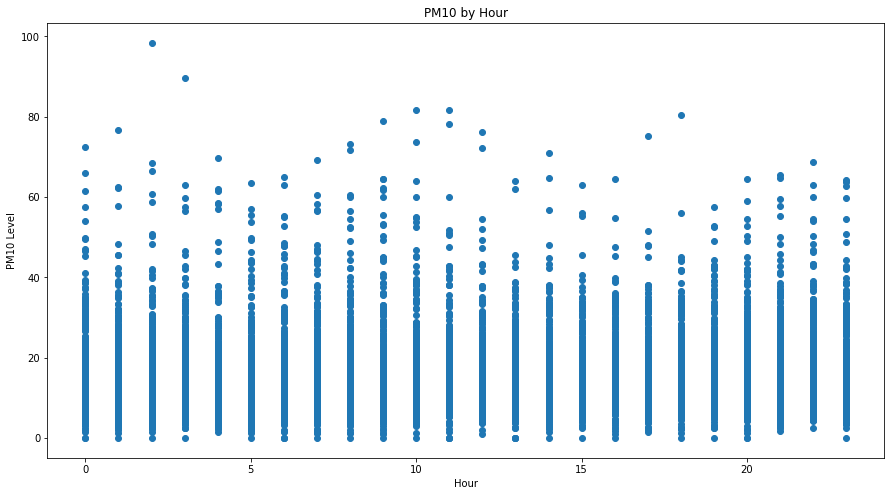

In [28]:
x=data_new['HOUR']
y=data_new['PM10']
plt.rcParams["figure.figsize"] = [15,8]
plt.scatter(x,y)
plt.xlabel('Hour')
plt.ylabel('PM10 Level')
plt.title('PM10 by Hour')
plt.show()

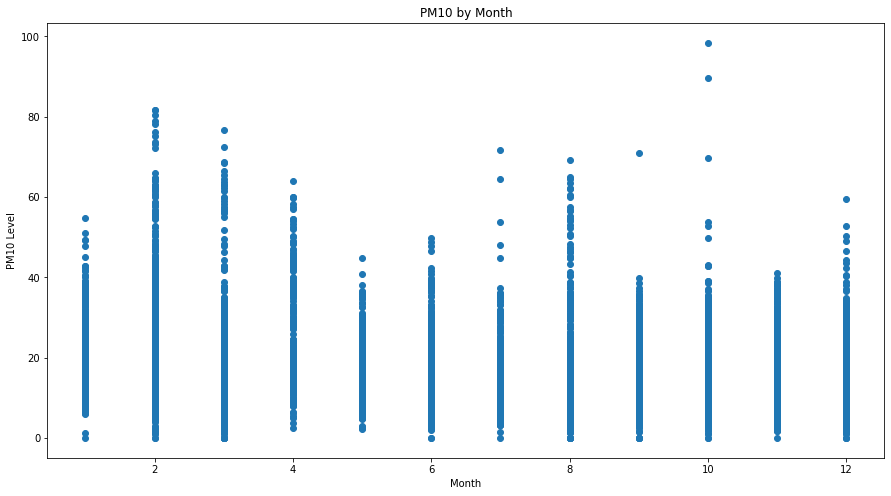

In [29]:

x=data_new['MONTH']
y=data_new['PM10']
plt.rcParams["figure.figsize"] = [15,8]
plt.scatter(x,y)
plt.xlabel('Month')
plt.ylabel('PM10 Level')
plt.title('PM10 by Month')
plt.show()

In [30]:
##data_new.set_index('DATE').plot(subplots=True,layout=(100,200), figsize=(12, 12),sharex=False);

In [31]:
data_new.describe()

,DEW,TMP,DIR,SPD,HUM,NOX,O3,PM10,MONTH,DAY,HOUR
count,8754.00000,8754.000000,8717.000000,8754.000000,8754.000000,8672.000000,8681.000000,7898.000000,8760.000000,8760.000000,8760.000000
mean,7.12108,11.465986,205.573485,13.644246,50.607584,45.826107,38.449234,16.740972,6.526027,2.994521,11.500000
std,4.75622,6.218934,86.789796,8.078503,27.144784,43.549004,20.951295,10.005195,3.448048,2.000107,6.922582
min,-6.70000,-5.800000,10.000000,0.000000,0.000000,3.400000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,3.70000,7.154167,143.333333,7.560000,27.403905,20.700000,24.300000,10.400000,4.000000,1.000000,5.750000
50%,7.10000,10.900000,225.000000,12.960000,51.512305,32.500000,39.200000,14.400000,7.000000,3.000000,11.500000
75%,10.80000,15.866667,266.666667,18.540000,74.394701,53.600000,52.400000,20.300000,10.000000,5.000000,17.250000
max,19.65000,36.766667,360.000000,52.740000,99.993724,496.100010,122.800000,98.400000,12.000000,6.000000,23.000000


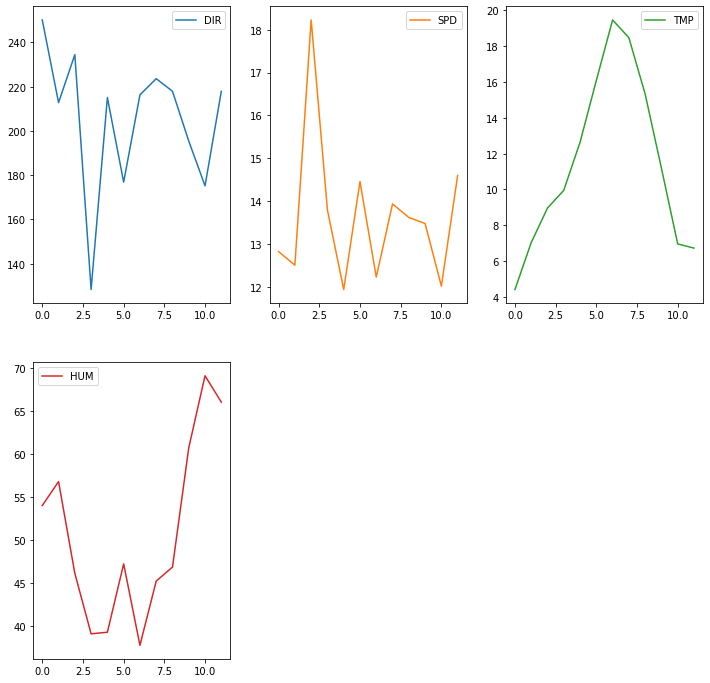

In [33]:
data_new = data[['DIR','SPD','TMP','HUM','MONTH']].groupby('MONTH').apply(lambda x:x.mean())
data_new.drop('MONTH',axis=1).reset_index().drop('MONTH',axis=1).plot(subplots=True,layout=(2,3), figsize=(12, 12),sharex=False);

In [ ]:
data